# <font color = 'red'> Advanced Regression Assignment </font>

### Problem Statement - Part 1

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Process going to be followed,

>**Step 1:** Reading and Understanding the Data<br>
**Step 2:** Data Inspection<br>
**Step 3:** EDA<br>
**Step 4:** Data Preparation<br>
**Step 5:** Modelling<br>
**Step 6:** Tunning with Regularization(Ridge and Lasso)<br>

### Step 1: Reading and Understanding the Data
Let's start with,

- Importing data using the pandas library
- Understanding the structure of the data

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [65]:
# reading the dataset
housingdf = pd.read_csv("train.csv")

In [66]:
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
housingdf.shape

(1460, 81)

In [68]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [69]:
housingdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Removing Unwanted column `Id`

In [70]:
# Removing Id
housingdf.drop('Id',axis=1,inplace=True)

In [71]:
#let's check the shape again
housingdf.shape

(1460, 80)

### Step 2: Data Inspection

With the help of data dictionary given, we can see some variables have incorrect data type.

In [72]:
# Converting from (int and float) to object 
housingdf['TotRmsAbvGrd'] = housingdf['TotRmsAbvGrd'].astype('object')
housingdf['BedroomAbvGr'] = housingdf['BedroomAbvGr'].astype('object')
housingdf['Fireplaces'] = housingdf['Fireplaces'].astype('object')
housingdf['GarageCars'] = housingdf['GarageCars'].astype('object')
housingdf['MSSubClass'] = housingdf['MSSubClass'].astype('object')
housingdf['FullBath'] = housingdf['FullBath'].astype('object')
housingdf['HalfBath'] = housingdf['HalfBath'].astype('object')
housingdf['OverallQual'] = housingdf['OverallQual'].astype('object')
housingdf['OverallCond'] = housingdf['OverallCond'].astype('object')
housingdf['BsmtHalfBath'] = housingdf['BsmtHalfBath'].astype('object')
housingdf['KitchenAbvGr'] = housingdf['KitchenAbvGr'].astype('object')
housingdf['BsmtFullBath'] = housingdf['BsmtFullBath'].astype('object')


### Step 3: EDA

Let's check the null values in our data

In [73]:
# Missing percentage
round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)[:40]

MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
dtype: float64

In [74]:
round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)[40:]

CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
dtype: float64

We can see **FireplaceQu, LotFrontage, GarageQual, GarageCond, GarageType, GarageYrBlt, GarageFinish, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType, MasVnrArea** having more null values.<br>
Instead of dropping it. Let's impute them with the values given in data dictionary. Except **PoolQC, Fence, MiscFeature, Alley** since they have more than 80 percent of the data has null values.

In [85]:
# Dropping PoolQC, Fence, MiscFeature, Alley
housingdf.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'],axis=1,inplace=True)

In [76]:
housingdf['LotFrontage'].fillna(0.00,inplace=True)
housingdf['MasVnrArea'].fillna(0.00,inplace=True)
housingdf['MasVnrType'].fillna('None',inplace=True)
housingdf['FireplaceQu'].fillna('No Fireplace',inplace=True)
housingdf['LotFrontage'].fillna(0.00,inplace=True)
housingdf['GarageQual'].fillna('No Garage',inplace=True)
housingdf['GarageCond'].fillna('No Garage',inplace=True)
housingdf['GarageType'].fillna('No Garage',inplace=True)
housingdf['GarageYrBlt'].fillna('No Garage',inplace=True)
housingdf['GarageFinish'].fillna('No Garage',inplace=True)
housingdf['BsmtQual'].fillna('No Basement',inplace=True)
housingdf['BsmtCond'].fillna('No Basement',inplace=True)
housingdf['BsmtExposure'].fillna('No Basement',inplace=True)
housingdf['BsmtFinType1'].fillna('No Basement',inplace=True)
housingdf['BsmtFinType2'].fillna('No Basement',inplace=True)

Let's check the variables again

In [77]:
round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)[:40]

MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
HeatingQC       0.0
dtype: float64

In [78]:
round(100*(housingdf.isnull().sum()/len(housingdf.index)),2)[40:]

CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
FireplaceQu      0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea       0.00
GarageQual       0.00
GarageCond       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
PoolQC           0.00
Fence            0.00
MiscFeature      0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
dtype: float64

Let's take all the continous variables and check with boxplot for univariate analysis and pairplot or heatmap for multivariate analysis

In [86]:
# Taking all numeric variables
housingdf_numeric = housingdf.select_dtypes(include=['float64', 'int64'])
housingdf_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [87]:
housingdf_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  GarageArea     1460 non-null   int64  
 14  WoodDeckSF     1460 non-null   int64  
 15  OpenPorchSF    1460 non-null   int64  
 16  EnclosedPorch  1460 non-null   int64  
 17  3SsnPorch      1460 non-null   int64  
 18  ScreenPo

We can clearly see, even though YrSold, MoSold are numeric. We need to treat the months and year as categorical value. So let's check all the columns first, then remove them from housing numeric dataframe.

In [88]:
housingdf_numeric.nunique()

LotFrontage       111
LotArea          1073
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

With the help of nunique() and data dictionary, we can see **YearBuilt, YearRemodAdd, MoSold, YrSold** all these columns are categorical.

In [89]:
# Dropping all these columns from housing numeric dataframe
housingdf_numeric.drop(['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'],axis=1,inplace=True)
housingdf_numeric.shape

(1460, 20)

In [90]:
housingdf_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Before going to correlation plot or pair plot. Let's check wheather we have any outliers using **box plot**

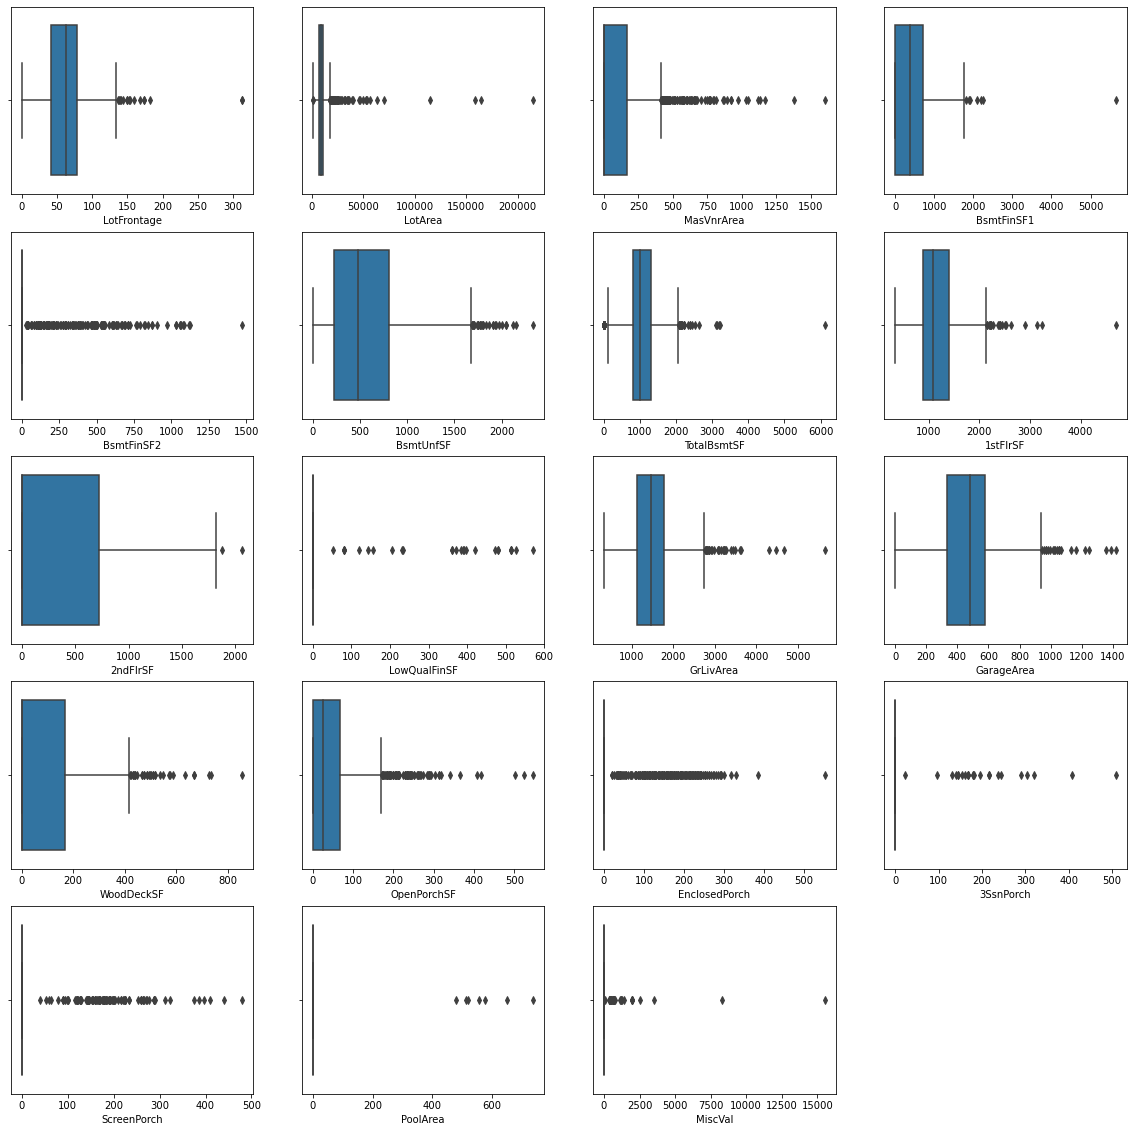

In [91]:
# Let's see box plot of all numerical variables
plt.figure(figsize=(20,20))
plt.subplot(5,4,1)
sns.boxplot(data=housingdf_numeric, x='LotFrontage')
plt.subplot(5,4,2)
sns.boxplot(data=housingdf_numeric, x='LotArea')
plt.subplot(5,4,3)
sns.boxplot(data=housingdf_numeric, x='MasVnrArea')
plt.subplot(5,4,4)
sns.boxplot(data=housingdf_numeric, x='BsmtFinSF1')
plt.subplot(5,4,5)
sns.boxplot(data=housingdf_numeric, x='BsmtFinSF2')
plt.subplot(5,4,6)
sns.boxplot(data=housingdf_numeric, x='BsmtUnfSF')
plt.subplot(5,4,7)
sns.boxplot(data=housingdf_numeric, x='TotalBsmtSF')
plt.subplot(5,4,8)
sns.boxplot(data=housingdf_numeric, x='1stFlrSF')
plt.subplot(5,4,9)
sns.boxplot(data=housingdf_numeric, x='2ndFlrSF')
plt.subplot(5,4,10)
sns.boxplot(data=housingdf_numeric, x='LowQualFinSF')
plt.subplot(5,4,11)
sns.boxplot(data=housingdf_numeric, x='GrLivArea')
plt.subplot(5,4,12)
sns.boxplot(data=housingdf_numeric, x='GarageArea')
plt.subplot(5,4,13)
sns.boxplot(data=housingdf_numeric, x='WoodDeckSF')
plt.subplot(5,4,14)
sns.boxplot(data=housingdf_numeric, x='OpenPorchSF')
plt.subplot(5,4,15)
sns.boxplot(data=housingdf_numeric, x='EnclosedPorch')
plt.subplot(5,4,16)
sns.boxplot(data=housingdf_numeric, x='3SsnPorch')
plt.subplot(5,4,17)
sns.boxplot(data=housingdf_numeric, x='ScreenPorch')
plt.subplot(5,4,18)
sns.boxplot(data=housingdf_numeric, x='PoolArea')
plt.subplot(5,4,19)
sns.boxplot(data=housingdf_numeric, x='MiscVal')
plt.show()

PoolArea have the wide outlier but have more than 75 percentage of the values has zero. First let's check the percentailes even better using describe

In [92]:
housingdf_numeric.describe(percentiles=[0.1,0.2,0.25,0.5,0.75,0.90,0.95,0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,0.000000,5000.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000
20%,24.000000,7078.400000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.000000,1066.600000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124000.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000


We can clearly see **LowQualFinSF, 3SsnPorch, PoolArea, MiscVal, BsmtFinSF2, EnclosedPorch, ScreenPorch** have only 0's in more than 75 percent of their values. Since we are focing on the best features affecting the price and it is being constant most of the time it won't give much affet in our model. So dropping them.

In [95]:
housingdf.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal','BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch'],axis=1,inplace=True)
housingdf_numeric.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal','BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch'],axis=1,inplace=True)

Let's check the box plot again

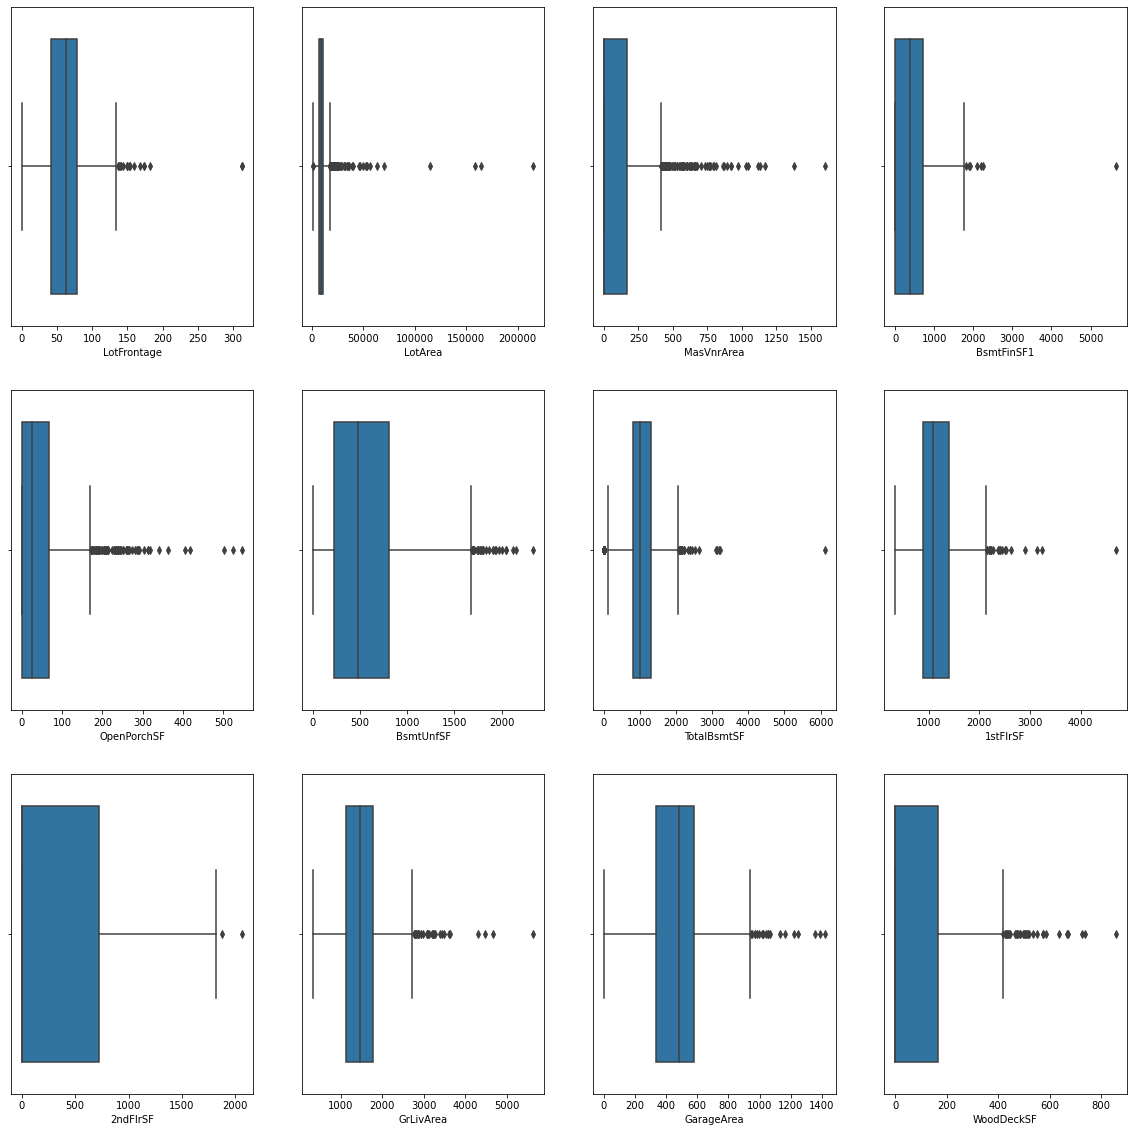

In [97]:
# Let's see box plot of all numerical variables
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.boxplot(data=housingdf_numeric, x='LotFrontage')
plt.subplot(3,4,2)
sns.boxplot(data=housingdf_numeric, x='LotArea')
plt.subplot(3,4,3)
sns.boxplot(data=housingdf_numeric, x='MasVnrArea')
plt.subplot(3,4,4)
sns.boxplot(data=housingdf_numeric, x='BsmtFinSF1')
plt.subplot(3,4,6)
sns.boxplot(data=housingdf_numeric, x='BsmtUnfSF')
plt.subplot(3,4,7)
sns.boxplot(data=housingdf_numeric, x='TotalBsmtSF')
plt.subplot(3,4,8)
sns.boxplot(data=housingdf_numeric, x='1stFlrSF')
plt.subplot(3,4,9)
sns.boxplot(data=housingdf_numeric, x='2ndFlrSF')
plt.subplot(3,4,10)
sns.boxplot(data=housingdf_numeric, x='GrLivArea')
plt.subplot(3,4,11)
sns.boxplot(data=housingdf_numeric, x='GarageArea')
plt.subplot(3,4,12)
sns.boxplot(data=housingdf_numeric, x='WoodDeckSF')
plt.subplot(3,4,5)
sns.boxplot(data=housingdf_numeric, x='OpenPorchSF')
plt.show()

We have most of the outliers only in upperbound. So let's try to remove them.<br>
Let's start with LotArea

In [106]:
housingdf = housingdf[~(housingdf.LotArea > housingdf.LotArea.quantile(.95))]

Let's check the box plot again

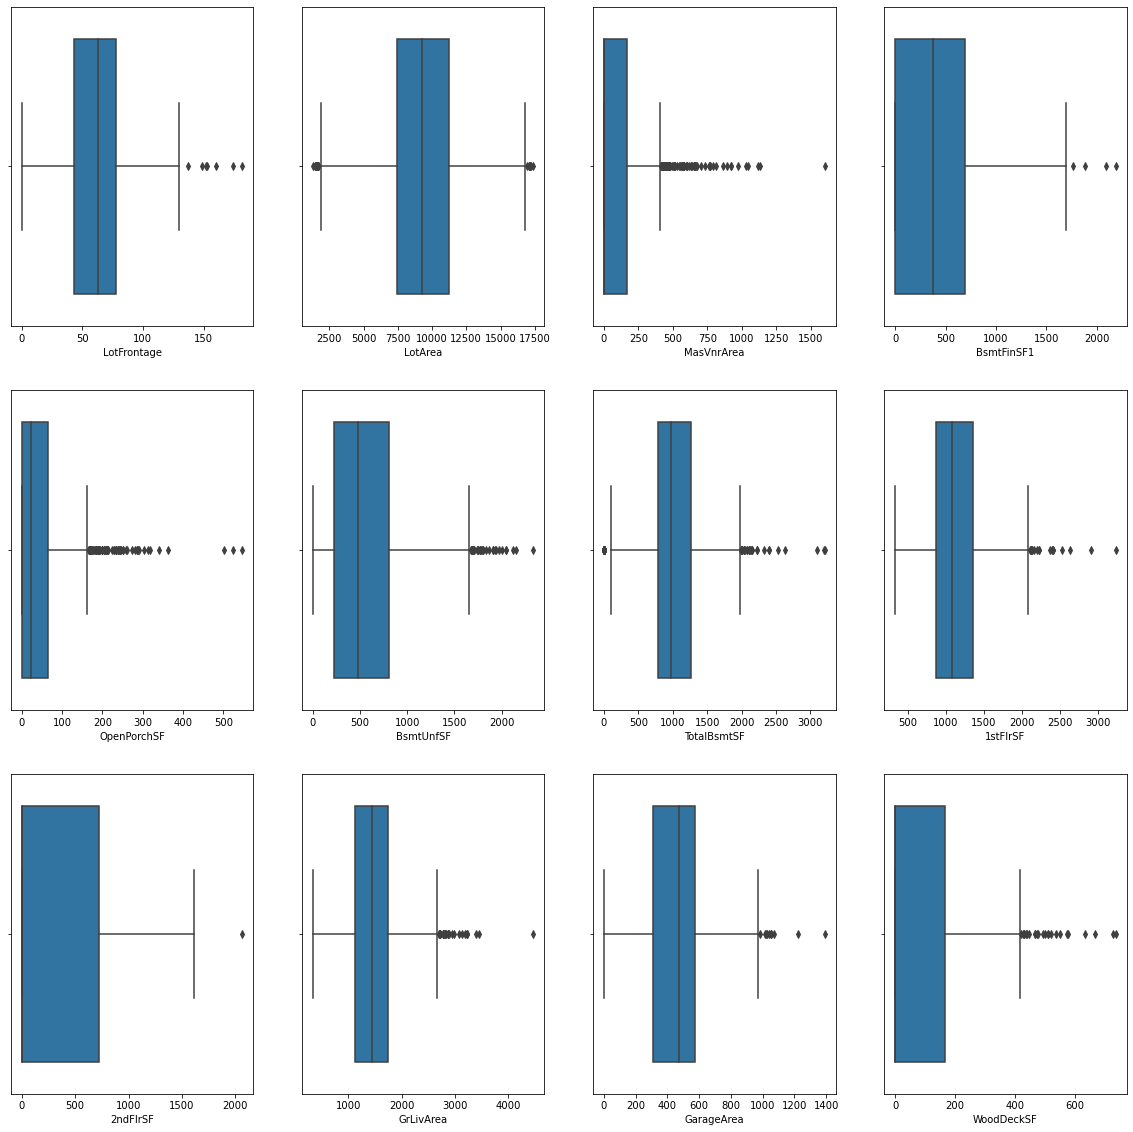

In [107]:
# Let's see box plot of all numerical variables
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.boxplot(data=housingdf, x='LotFrontage')
plt.subplot(3,4,2)
sns.boxplot(data=housingdf, x='LotArea')
plt.subplot(3,4,3)
sns.boxplot(data=housingdf, x='MasVnrArea')
plt.subplot(3,4,4)
sns.boxplot(data=housingdf, x='BsmtFinSF1')
plt.subplot(3,4,6)
sns.boxplot(data=housingdf, x='BsmtUnfSF')
plt.subplot(3,4,7)
sns.boxplot(data=housingdf, x='TotalBsmtSF')
plt.subplot(3,4,8)
sns.boxplot(data=housingdf, x='1stFlrSF')
plt.subplot(3,4,9)
sns.boxplot(data=housingdf, x='2ndFlrSF')
plt.subplot(3,4,10)
sns.boxplot(data=housingdf, x='GrLivArea')
plt.subplot(3,4,11)
sns.boxplot(data=housingdf, x='GarageArea')
plt.subplot(3,4,12)
sns.boxplot(data=housingdf, x='WoodDeckSF')
plt.subplot(3,4,5)
sns.boxplot(data=housingdf, x='OpenPorchSF')
plt.show()

Removing outliers in MasVnrArea variable

In [108]:
housingdf = housingdf[~(housingdf.MasVnrArea > housingdf.MasVnrArea.quantile(.95))]

Let's check the box plots again

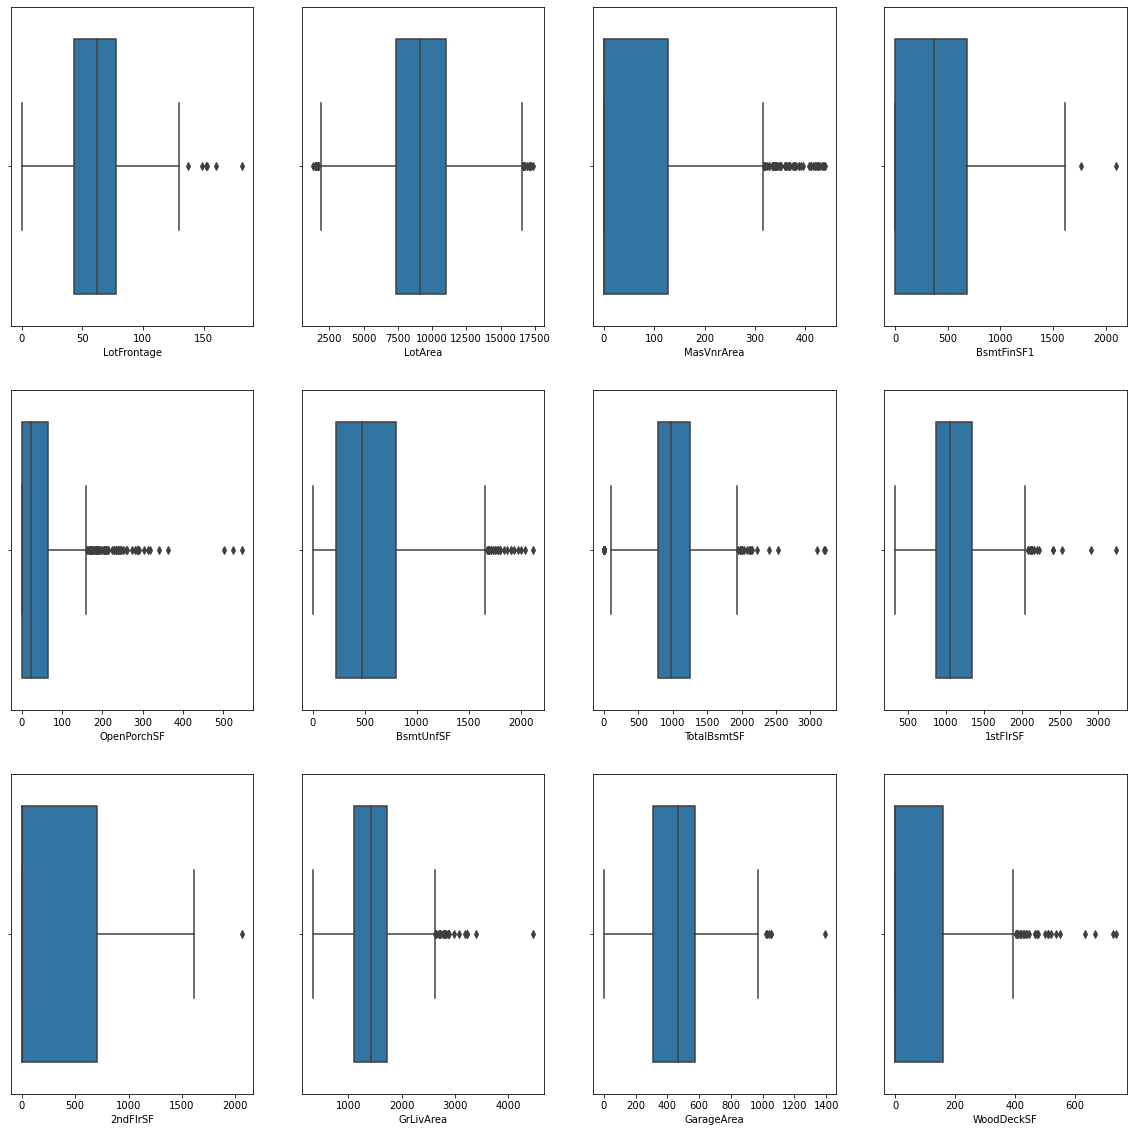

In [109]:
# Let's see box plot of all numerical variables
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.boxplot(data=housingdf, x='LotFrontage')
plt.subplot(3,4,2)
sns.boxplot(data=housingdf, x='LotArea')
plt.subplot(3,4,3)
sns.boxplot(data=housingdf, x='MasVnrArea')
plt.subplot(3,4,4)
sns.boxplot(data=housingdf, x='BsmtFinSF1')
plt.subplot(3,4,6)
sns.boxplot(data=housingdf, x='BsmtUnfSF')
plt.subplot(3,4,7)
sns.boxplot(data=housingdf, x='TotalBsmtSF')
plt.subplot(3,4,8)
sns.boxplot(data=housingdf, x='1stFlrSF')
plt.subplot(3,4,9)
sns.boxplot(data=housingdf, x='2ndFlrSF')
plt.subplot(3,4,10)
sns.boxplot(data=housingdf, x='GrLivArea')
plt.subplot(3,4,11)
sns.boxplot(data=housingdf, x='GarageArea')
plt.subplot(3,4,12)
sns.boxplot(data=housingdf, x='WoodDeckSF')
plt.subplot(3,4,5)
sns.boxplot(data=housingdf, x='OpenPorchSF')
plt.show()

Removing outliers in OpenPorchSF variable

In [110]:
housingdf = housingdf[~(housingdf.OpenPorchSF > housingdf.OpenPorchSF.quantile(.95))]

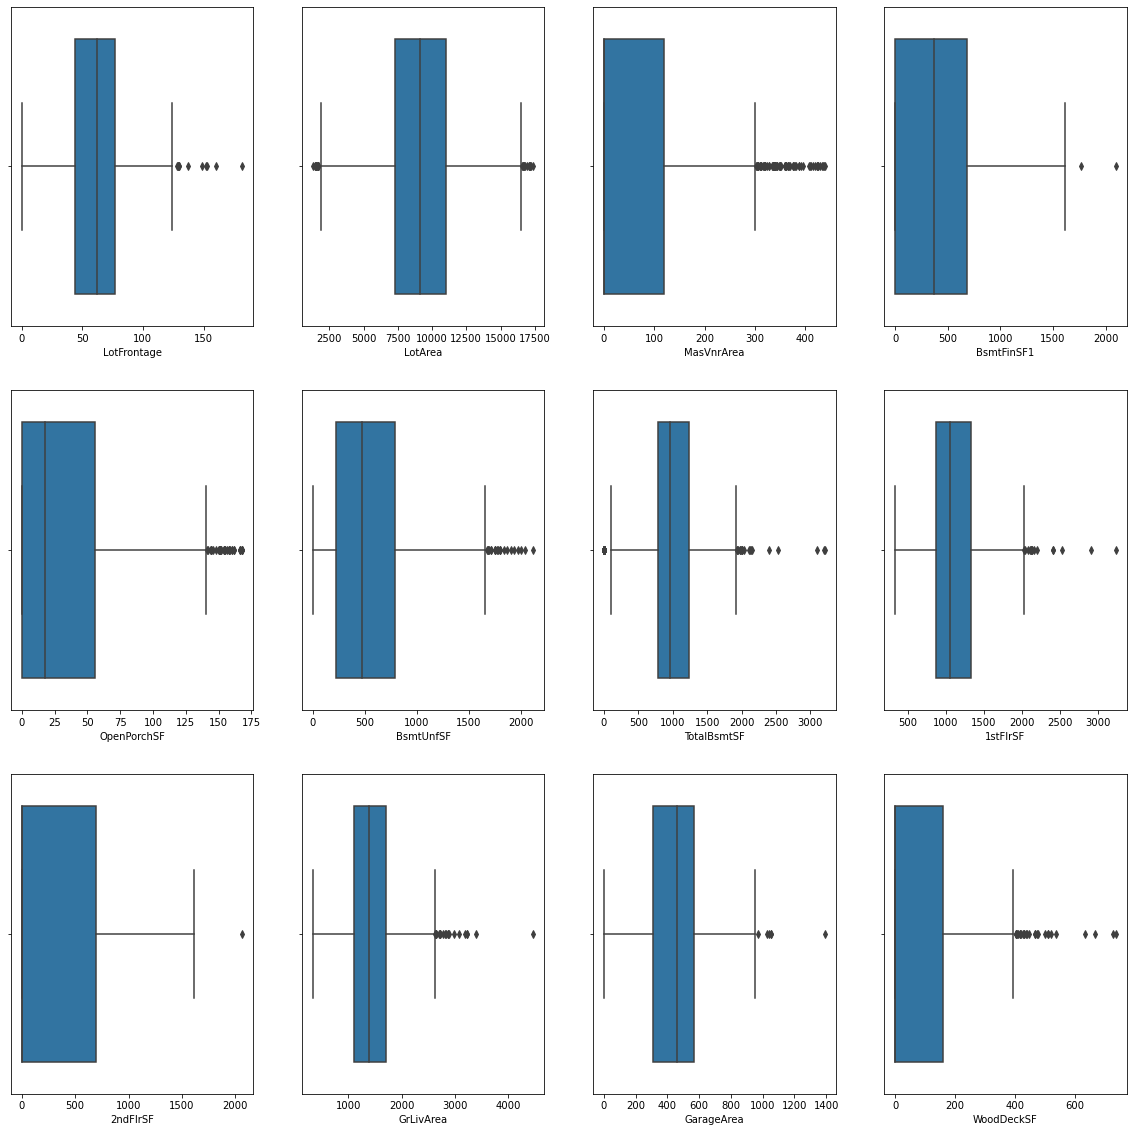

In [111]:
# Let's check the box plots again
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.boxplot(data=housingdf, x='LotFrontage')
plt.subplot(3,4,2)
sns.boxplot(data=housingdf, x='LotArea')
plt.subplot(3,4,3)
sns.boxplot(data=housingdf, x='MasVnrArea')
plt.subplot(3,4,4)
sns.boxplot(data=housingdf, x='BsmtFinSF1')
plt.subplot(3,4,6)
sns.boxplot(data=housingdf, x='BsmtUnfSF')
plt.subplot(3,4,7)
sns.boxplot(data=housingdf, x='TotalBsmtSF')
plt.subplot(3,4,8)
sns.boxplot(data=housingdf, x='1stFlrSF')
plt.subplot(3,4,9)
sns.boxplot(data=housingdf, x='2ndFlrSF')
plt.subplot(3,4,10)
sns.boxplot(data=housingdf, x='GrLivArea')
plt.subplot(3,4,11)
sns.boxplot(data=housingdf, x='GarageArea')
plt.subplot(3,4,12)
sns.boxplot(data=housingdf, x='WoodDeckSF')
plt.subplot(3,4,5)
sns.boxplot(data=housingdf, x='OpenPorchSF')
plt.show()

In [113]:
housingdf[housingdf_numeric.columns].describe(percentiles=[0.1,0.2,0.25,0.5,0.75,0.90,0.95,0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,56.912070,9110.657074,69.975220,415.613909,556.392486,1014.745803,1122.549161,316.214229,1443.749800,452.799361,88.151079,33.987210,170235.848122
std,31.275451,3106.828216,111.092287,407.891755,428.865693,394.075330,345.920407,409.751500,458.581329,203.080592,116.991735,43.287095,67787.081852
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,35311.000000
10%,0.000000,5000.000000,0.000000,0.000000,64.000000,625.000000,755.000000,0.000000,894.000000,240.000000,0.000000,0.000000,103000.000000
20%,34.000000,6979.000000,0.000000,0.000000,173.000000,735.000000,840.000000,0.000000,1040.000000,288.000000,0.000000,0.000000,120000.000000
25%,44.000000,7313.500000,0.000000,0.000000,218.000000,780.000000,864.000000,0.000000,1098.500000,308.000000,0.000000,0.000000,127000.000000
50%,62.000000,9100.000000,0.000000,374.000000,474.000000,961.000000,1056.000000,0.000000,1396.000000,462.000000,0.000000,18.000000,155000.000000
75%,77.000000,10992.500000,120.000000,682.000000,793.500000,1238.500000,1327.500000,692.500000,1710.000000,570.000000,160.000000,56.000000,199900.000000
90%,89.000000,13072.000000,256.000000,1003.000000,1191.000000,1525.000000,1620.000000,887.000000,2013.000000,701.000000,240.000000,104.000000,255900.000000


We have removed the huge outliers and happy with the values we have now.<br>
Let's see the correlation between the variables using heatmap

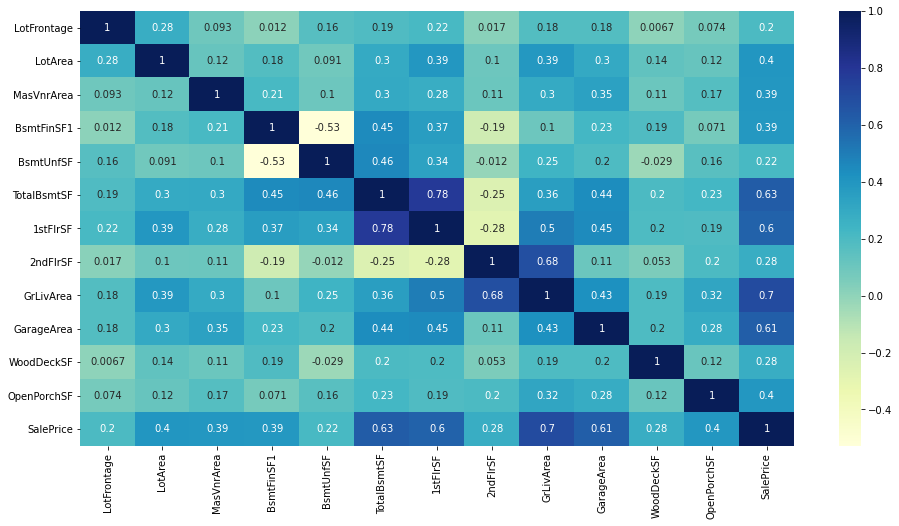

In [114]:
# Let's plot a correlation matrix
corr = housingdf[housingdf_numeric.columns].corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()


- Our target variable SalePrice have good correlation with the GrLivArea, TotalBsmtSF, Garage and 1stFirSF. 
- Amoung the predictor variables, TotalBsmtSF and 1stFirSF are highly correlated and 
- GrLivArea and 2ndFirSF have good correlation between them.<br>
But none of them have very good correlation which lead to drop the another variable. So proceeding with as it is.

### Step 4: Data Preparation

#### Creating Dummy Variables

In [116]:
# creating dummy variables for categorical variables

# subset all categorical variables
housingdf_categorical = housingdf.select_dtypes(include=['object'])
housingdf_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,No Fireplace,Attchd,2003.0,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,1976.0,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,2001.0,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,2000.0,RFn,3,TA,TA,Y,WD,Normal


In [117]:
# convert into dummies - one hot encoding
housingdf_dummies = pd.get_dummies(housingdf_categorical, drop_first=True)
housingdf_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [118]:
# drop categorical variables 
housingdf = housingdf.drop(list(housingdf_categorical.columns), axis=1)

In [119]:
# concat dummy variables with housingdf
housingdf = pd.concat([housingdf, housingdf_dummies], axis=1)

In [120]:
housingdf.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [121]:
housingdf.shape

(1251, 381)

#### Splitting the Data into Training and Testing Sets

In [125]:
# Dividing into X and y sets for the model building
y = housingdf.pop('SalePrice') # response variable in y
X = housingdf # predictors in variable X

#### Rescaling some of the features using MinMax scaler

In [154]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [189]:
# importing necessary library

from sklearn.model_selection import train_test_split

# Spliting our data into 70-30 train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Step 5: Model Building

#### Linear Regression

Let's now try predicting car prices, a dataset using linear regression and RFE and get the best top 100 features

In [190]:
#Building model using sklearn- RFE

# Running RFE and getting top 100 features
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,100)
rfe = rfe.fit(X_train,y_train)

In [191]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 217),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 22),
 ('MasVnrArea', False, 165),
 ('BsmtFinSF1', False, 6),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 180),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 52),
 ('WoodDeckSF', False, 242),
 ('OpenPorchSF', False, 236),
 ('MoSold', False, 218),
 ('YrSold', False, 211),
 ('MSSubClass_30', False, 183),
 ('MSSubClass_40', False, 260),
 ('MSSubClass_45', False, 80),
 ('MSSubClass_50', False, 219),
 ('MSSubClass_60', False, 267),
 ('MSSubClass_70', False, 41),
 ('MSSubClass_75', False, 129),
 ('MSSubClass_80', False, 109),
 ('MSSubClass_85', False, 198),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 34),
 ('MSSubClass_160', False, 3),
 ('MSSubClass_180', False, 37),
 ('MSSubClass_190', False, 110),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', Fal

In [192]:
# Getting the top 100 columns
col = X_train.columns[rfe.support_]
X_train = X_train[col]

## Step 6: Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [193]:
# list of alphas to tune -
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [195]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.29375876e+03  9.05159452e+03 -7.19329781e+03  1.66826736e+04
  3.51271257e+03  1.87830159e+04 -5.88605512e+02  3.44767793e+03
  1.18175165e+03  3.12919977e+03  5.70069726e+02 -9.09799131e+02
  3.64422795e+03 -3.51883617e-27 -5.88605512e+02 -7.99657843e+02
 -1.52456475e+03 -3.56086110e+03 -4.42866409e+03 -3.19547709e+03
  1.35127705e+03  7.52902570e+03  9.76869347e+03  9.97046423e+03
  1.63232239e+03 -3.13900314e+03 -2.43355435e+03 -2.46490641e+03
 -2.80062382e+02  3.44418311e+03  2.85571381e+03  2.76035742e+03
  1.75806047e-27 -2.37962861e+02  1.11494317e+02 -2.37962861e+02
  1.11494317e+02  1.99468833e+02  1.61978873e+03  3.59307520e+03
 -5.09109897e+02  1.64503204e+02 -2.64640025e+02 -9.57439824e+02
  2.54845492e+02  3.39006784e+03 -4.29890813e+03  1.11826047e+03
 -3.71139911e+03  1.11826047e+03 -1.30218194e+03  3.29861313e+03
  1.11826047e+03 -1.13348576e+03 -2.66269431e+02  1.77769939e+02
  4.79083234e+03 -3.04054674e+02  1.77972993e+03 -1.85562255e+03
  1.75806047e-27  4.81537

In [196]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9226274528974265
0.8942788009716297
291644968309.6912
203799858248.22498
333308535.21107566
542020899.596343


### Lasso Regression

In [197]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [199]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [200]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [201]:
lasso.coef_

array([ 4.66685693e+03,  1.13969478e+04, -7.85878288e+03,  1.52438457e+04,
        0.00000000e+00,  2.45491013e+04, -1.11940461e+03,  2.19343549e+03,
        7.85623022e+01,  1.27577522e+03, -0.00000000e+00, -0.00000000e+00,
        3.45555119e+03,  0.00000000e+00, -5.60016644e+00, -0.00000000e+00,
       -0.00000000e+00, -9.44358381e+02, -5.92447899e+02, -0.00000000e+00,
        3.82129135e+03,  9.68958493e+03,  1.17379951e+04,  1.07109512e+04,
        0.00000000e+00, -2.50889762e+03, -2.04198550e+03, -1.60210724e+03,
        0.00000000e+00,  3.67138134e+03,  3.07233012e+03,  2.69110915e+03,
       -0.00000000e+00, -8.78426441e+01, -0.00000000e+00, -1.30325738e-12,
       -0.00000000e+00,  0.00000000e+00,  1.25688539e+03,  3.70960010e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.55237488e+02,
        0.00000000e+00,  2.95135196e+03, -2.02666540e+03,  1.12785838e+03,
       -2.00356880e+03,  7.30463981e+01, -7.42901894e+02,  2.59741428e+03,
        1.61967919e+01,  

In [203]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9205467978644203
0.8943149963343507
299487705739.02844
203730084069.9185
342271663.70174676
541835329.9731874


### Lets observe the difference in the coefficients for Ridge and Lasso

In [222]:
betas = pd.DataFrame(index=col)

In [223]:
betas.rows = col

In [232]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [233]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
LotArea,5.293759e+03,4.666857e+03
YearBuilt,9.051595e+03,1.139695e+04
BsmtUnfSF,-7.193298e+03,-7.858783e+03
TotalBsmtSF,1.668267e+04,1.524385e+04
2ndFlrSF,3.512713e+03,0.000000e+00
GrLivArea,1.878302e+04,2.454910e+04
MSSubClass_90,-5.886055e+02,-1.119405e+03
MSZoning_FV,3.447678e+03,2.193435e+03
MSZoning_RH,1.181752e+03,7.856230e+01
MSZoning_RL,3.129200e+03,1.275775e+03


## <font color = 'red'> Top 5 Features of Ridge and Lasso </font><font size = 3>(with the co-efficients)</font>

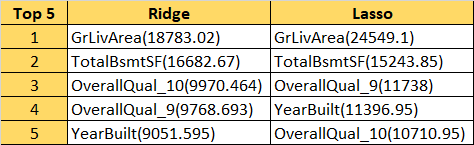

### Problem Statement - Part 2

**Question 1<br>**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Optimal value of alpha for Ridge regression - 50<br>
Optimal value of alpha for Lasso regression - 500**<br>

Important predictors before the change

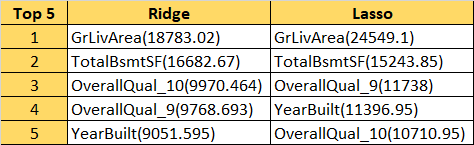

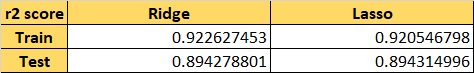

After doubling the alpha values,

Optimal value of alpha for Ridge regression - 100<br>
Optimal value of alpha for Lasso regression - 1000<br>


In [235]:
### RIDGE

#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.35486413e+03  7.56240128e+03 -6.21622582e+03  1.50296032e+04
  3.44354455e+03  1.63197681e+04 -5.10644001e+02  3.01056498e+03
  8.89430889e+02  2.27751401e+03 -5.62093829e+02 -9.08549136e+02
  3.29656739e+03 -1.81225252e-27 -5.10644001e+02 -1.00871615e+03
 -1.58411202e+03 -3.47807789e+03 -4.20689174e+03 -3.02217057e+03
  1.25091230e+03  7.12714107e+03  9.22299988e+03  9.59247327e+03
  1.67745702e+03 -2.96488745e+03 -2.38865623e+03 -2.03460096e+03
 -3.33846915e+02  3.10145942e+03  2.53410137e+03  2.42957349e+03
  9.05433148e-28 -2.64062574e+02  2.75269233e+02 -2.64062574e+02
  2.75269233e+02 -5.47200673e+00  1.76652511e+03  3.19082829e+03
 -1.64377900e+03 -8.12089425e+01 -1.42699860e+02 -9.30885667e+02
  2.47004201e+02  3.38979425e+03 -3.45837264e+03  6.84013077e+02
 -3.42013513e+03  6.84013077e+02 -1.27722513e+03  3.48208387e+03
  6.84013077e+02 -3.97681278e+02 -2.33152607e+02  1.78162613e+02
  4.98705334e+03 -1.57134159e+02  1.72698888e+03 -1.80169932e+03
  9.05433148e-28  1.63330

In [237]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)


0.9182721379686271
0.8901038580537208


In [238]:
### LASSO

#Fitting Lasso model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 4.58311746e+03  1.09097891e+04 -6.89807925e+03  1.41342533e+04
  0.00000000e+00  2.44645859e+04 -4.99733660e+02  1.20887370e+03
  0.00000000e+00  0.00000000e+00 -9.12332542e+02 -0.00000000e+00
  2.96328796e+03 -0.00000000e+00 -2.36694228e+01 -0.00000000e+00
 -0.00000000e+00 -5.44581690e+02 -2.38653127e+02 -0.00000000e+00
  3.06973523e+03  9.05708876e+03  1.15893614e+04  1.04136519e+04
  0.00000000e+00 -1.74097400e+03 -1.77658487e+03 -3.80965823e+02
  0.00000000e+00  3.37834885e+03  2.70722348e+03  2.34731314e+03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.25506265e+03  4.04623326e+03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.63291588e+03 -0.00000000e+00  1.37254274e+02
 -7.21445977e+02  9.11450573e+01 -3.08574111e+02  2.39096250e+03
  2.24053548e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.15486868e+03 -7.64130489e+01  5.94499233e+02 -2.82650417e+03
  0.00000000e+00 -0.00000

In [239]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

0.9139536190374735
0.8875142450556175


In [240]:
betas_1 = pd.DataFrame(index=col)
betas_1.rows = col
betas_1['Ridge'] = ridge.coef_
betas_1['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas_1.head(100)

,Ridge,Lasso
LotArea,5.354864e+03,4.583117e+03
YearBuilt,7.562401e+03,1.090979e+04
BsmtUnfSF,-6.216226e+03,-6.898079e+03
TotalBsmtSF,1.502960e+04,1.413425e+04
2ndFlrSF,3.443545e+03,0.000000e+00
GrLivArea,1.631977e+04,2.446459e+04
MSSubClass_90,-5.106440e+02,-4.997337e+02
MSZoning_FV,3.010565e+03,1.208874e+03
MSZoning_RH,8.894309e+02,0.000000e+00
MSZoning_RL,2.277514e+03,0.000000e+00


After doubling, <br>
**Optimal value of alpha for Ridge regression - 100<br>
Optimal value of alpha for Lasso regression - 1000**<br>

**Top 5 features after alpha is doubled**

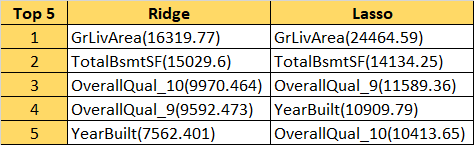

**r2 score after alpha is doubled**

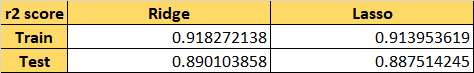

We can clearly see that when we increase the alpha (double) the coefficients getting decreased but the features remains the same 
and also the r2score of train is getting decreased since when we keep on increase the alpha it will lead to underfitting and getting high bias in the model.

**Question 2<br>**
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Ans:**
I am choosing Lasso's lambda. Since we are getting better r2 score in lasso when comparing the ridge and also since the lasso makes the feature selection as well. I am choosing Lasso.

**Optimal value of alpha for Lasso regression - 500**


**Question 3<br>**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Ans:**
Five most important predictor variables before exclusion are,

Five important variables before exclusion<br>
- GrLivArea<br>
- TotalBsmtSF<Br>
- OverallQual_9<br>
- YearBuilt<br>
- OverallQual_10<br>


In [246]:
X_train = X_train.drop(['GrLivArea','TotalBsmtSF','OverallQual_9','YearBuilt','OverallQual_10'],axis=1)

In [247]:
lasso1 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=1000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [248]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [249]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =0.0001

lasso1 = Lasso(alpha=alpha)

lasso1.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [250]:
lasso1.coef_

array([ 8.20051719e+03, -4.80415522e+03,  1.99002795e+03,  7.20030273e+02,
        7.86014667e+03,  3.93131400e+03,  1.37934896e+04,  7.49214806e+03,
       -6.12967494e+03,  2.95786315e+03, -0.00000000e+00, -1.88505151e+01,
       -8.53129404e+03, -1.83432069e+04, -4.04054786e+04, -6.32355733e+04,
       -5.75905207e+04, -4.60925661e+04, -2.46072969e+04,  7.55442611e+02,
       -2.91306167e+03, -2.16283612e+03, -2.65344852e+03, -1.55534041e+03,
        1.40803886e+03,  8.08559185e+02,  1.17938458e+03,  0.00000000e+00,
       -4.60213944e+01,  2.07560669e+03,  1.08243941e+01,  8.89974415e-02,
       -1.95127045e+02,  2.11868722e+03,  1.07372432e+04,  3.87821624e+03,
       -4.48123363e+02, -3.15248585e+02, -4.09113944e+02,  1.29322758e+01,
        3.68260185e+03, -4.71297352e+03, -1.04197041e+04, -5.64375820e+03,
       -9.21654571e+02, -2.83672816e+03,  4.51998910e+03,  1.67920649e+02,
        5.97156307e+03,  1.41991703e+03,  1.72588196e+02,  8.91774284e+03,
        2.18210629e+03,  

In [253]:
betas_2 = pd.DataFrame(index=X_train.columns)
betas_2.rows = X_train.columns
betas_2['Lasso'] = lasso1.coef_
pd.set_option('display.max_rows', None)
betas_2.head(100)

,Lasso
LotArea,8.200517e+03
BsmtUnfSF,-4.804155e+03
2ndFlrSF,1.990028e+03
MSSubClass_90,7.200303e+02
MSZoning_FV,7.860147e+03
MSZoning_RH,3.931314e+03
MSZoning_RL,1.379349e+04
MSZoning_RM,7.492148e+03
LandSlope_Sev,-6.129675e+03
Neighborhood_Crawfor,2.957863e+03


After excluding these five variables, built a lasso model again and getting the below five variables as the next five important predictors.
- OverallQual_5
- OverallQual_6
- TotRmsAbvGrd_5
- TotRmsAbvGrd_6
- TotRmsAbvGrd_7

**Question 4<br>**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

**Ans:**
The model will be robust and generalisable when we have low bias and low variance. I.e,With the help of regularization by tuning the lambda, we can reduce the coefficients of the variables which eventually reduces the model’s bias.
Ridge will reduce the coefficients and make it go towards zero.
Lasso will reduce and will make it zero which helps in feature selection as well.

So, when the difference in r2 score is less in between train and test(variance) and also we have good amount of accuracy in them(bias), our model will be robust and generalisable.
